The best solution is [4.95631864 4.37544027 3.06808385] 30.995188645020757
The correct solution is [4, 2, 3]
Number of steps/iterations = 309


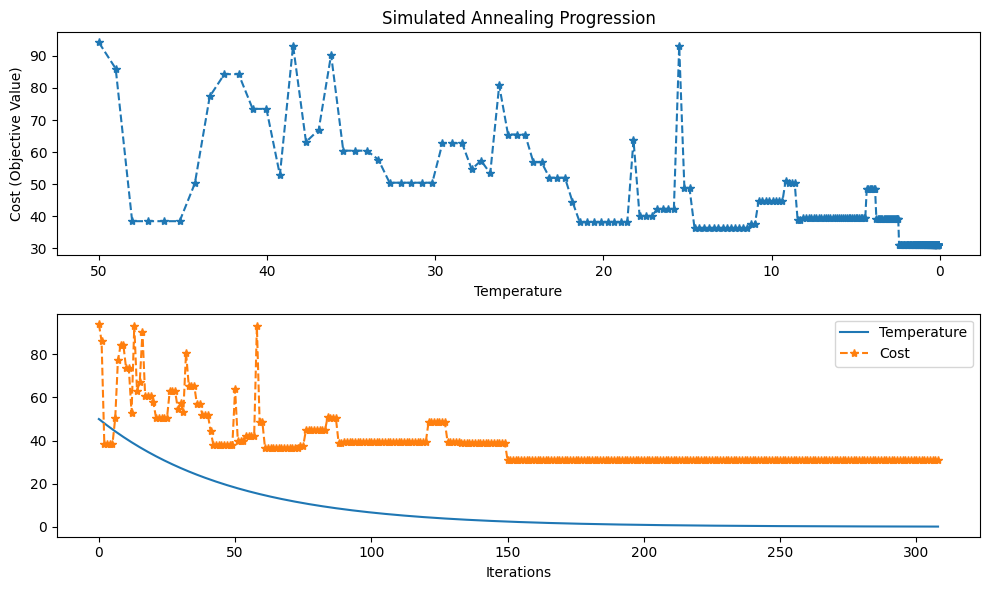

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Define the objective function
def func(var):
    x, y, z = var[0], var[1], var[2]
    return (x - 9)**2 + (y - 6)**2 + (z - 3)**2 + 12

# Define the probability function
def prob(delta, T):
    return math.exp(-delta / T)

# Simulated annealing function
def simulated_annealing(func, space_bounds, t_i, t_f, rate):
    dims = space_bounds.shape[0]
    # Initialize the starting position within the bounds
    current_pos = np.array([random.uniform(space_bounds[i][0], space_bounds[i][1]) for i in range(dims)])
    current_sol = func(current_pos)
    current_t = t_i
    Temp = [current_t]
    cost = [current_sol]
    iter = 0
    
    # Run simulated annealing
    while current_t > t_f and current_sol > 0.05 and iter < 50000:
        updated_pos = np.array([random.uniform(space_bounds[i][0], space_bounds[i][1]) for i in range(dims)])
        updated_sol = func(updated_pos)
        delta = updated_sol - current_sol
        
        # Accept or reject new solution based on delta and probability
        if delta < 0 or random.random() < prob(delta, current_t):
            current_pos = updated_pos
            current_sol = updated_sol
        
        # Update temperature and record
        current_t *= rate
        Temp.append(current_t)
        cost.append(current_sol)
        iter += 1

    return current_pos, current_sol, Temp, cost

# Define the search space and parameters
space_bounds = np.array([[0, 5], [0, 5], [0, 5]])
t_i, t_f, rate = 50.0, 0.1, 0.98

# Run the simulated annealing algorithm
current_pos, current_sol, Temp, cost = simulated_annealing(func, space_bounds, t_i, t_f, rate)
print("The best solution is", current_pos, current_sol)
print("The correct solution is [4, 2, 3]")
print("Number of steps/iterations =", len(cost))

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(Temp, cost, '*--')
plt.xlabel("Temperature")
plt.ylabel("Cost (Objective Value)")
plt.gca().invert_xaxis()
plt.title("Simulated Annealing Progression")

plt.subplot(2, 1, 2)
plt.plot(Temp, label="Temperature")
plt.plot(cost, '--*', label="Cost")
plt.xlabel("Iterations")
plt.legend()
plt.tight_layout()
plt.show()
